Building an Image Classifier using CNN

#Setup

In [88]:
# this is to split the dataset into two distinct datasets
# PLEASE NOTE this will be different for the desktop

import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
dataset_dir = path # Root dataset directory
train_dir = path[:-1] + "training"   # Directory where training data will be stored
val_dir = path[:-1] + "valid"    # Directory where validation data will be stored

# Create train and validation directories if not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split data for each class
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # Get all images in the class directory
    images = os.listdir(class_path)

    # Split images into train and validation sets
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class subdirectories in train and validation folders
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    # Move images to the respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

print("Data split completed!")


Data split completed!


In [89]:
import kagglehub
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
 
 


path = r"C:\Users\Strix\.cache\kagglehub\datasets\andrewmvd\medical-mnist\versions\1"
print(path)

#path = kagglehub.dataset_download("andrewmvd/medical-mnist")




C:\Users\Strix\.cache\kagglehub\datasets\andrewmvd\medical-mnist\versions\1


# Load a dataset

In [90]:
# Directory paths
train_dir = train_dir
validation_dir = val_dir

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    color_mode = "grayscale",
    batch_size=32,
    class_mode='categorical')  # For multi-class classification

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    color_mode = "grayscale",
    batch_size=32,
    class_mode='categorical')

Found 47163 images belonging to 6 classes.
Found 11791 images belonging to 6 classes.


# Build a neural network model

In [99]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Output layer with 6 classes
])


In [92]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,974 (2.61 MB)

 Trainable params: 683,974 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

#compiling the model:


In [101]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [98]:
# Check the output of flow_from_directory
print(f"Train generator classes: {train_generator.class_indices}")
print(f"Validation generator classes: {validation_generator.class_indices}")

# Check batch sizes and data shapes
for batch, labels in train_generator:
    print(f"Batch shape: {batch.shape}, Label shape: {labels.shape}")
    break  # Just inspect the first batch


Train generator classes: {'AbdomenCT': 0, 'BreastMRI': 1, 'CXR': 2, 'ChestCT': 3, 'Hand': 4, 'HeadCT': 5}
Validation generator classes: {'AbdomenCT': 0, 'BreastMRI': 1, 'CXR': 2, 'ChestCT': 3, 'Hand': 4, 'HeadCT': 5}
Batch shape: (32, 64, 64, 1), Label shape: (32, 6)


# training neural network model:


In [109]:
history = model.fit(train_generator, epochs=15, validation_data = validation_generator)

Epoch 1/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9972 - loss: 0.0110 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 2/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 0.9997 - val_loss: 8.7924e-04
Epoch 3/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9994 - val_loss: 0.0018
Epoch 4/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 86s 58ms/step - accuracy: 0.9974 - loss: 0.0095 - val_accuracy: 0.9998 - val_loss: 4.6812e-04
Epoch 5/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9966 - loss: 0.0132 - val_accuracy: 0.9990 - val_loss: 0.0050
Epoch 6/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9983 - loss: 0.0060 - val_accuracy: 0.9992 - val_loss: 0.0024
Epoch 7/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9988 - loss: 0.0042 - val_accuracy: 0.9998 - val_loss: 6.6241e-04
Epoch 8/15
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accura

#Evaluation



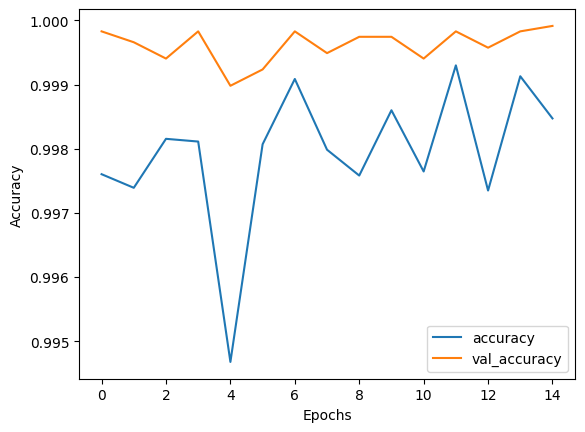

369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9999 - loss: 3.0160e-04
Test Accuracy: 0.9999151825904846


In [110]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the model
model.save('image_classifier_model.h5')

# Test the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy}')


In [114]:
# Checking if value exists
print(val_dir)
print(os.path.exists(val_dir + r"\HeadCT\000019.jpeg"))

print(f"{model.input_shape}")
print(img_array.shape)

C:\Users\Strix\.cache\kagglehub\datasets\andrewmvd\medical-mnist\versions\valid
True
(None, 64, 64, 1)
(1, 64, 64, 1)


#Predicting the first three images from the test set


1.   print the predicted results of the first three images from the test set
2.   print the real label of the first three images from the test set



In [115]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = val_dir + r"\HeadCT\000019.jpeg"
img = image.load_img(img_path, target_size=(64, 64), color_mode = "grayscale")
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

img_array /= 255.0

print(img_array.shape) # shape should be (1, 64, 64, 1)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print(f'Predicted Class: {predicted_class}')



(1, 64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Class: 5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


<Figure size 720x240 with 0 Axes>

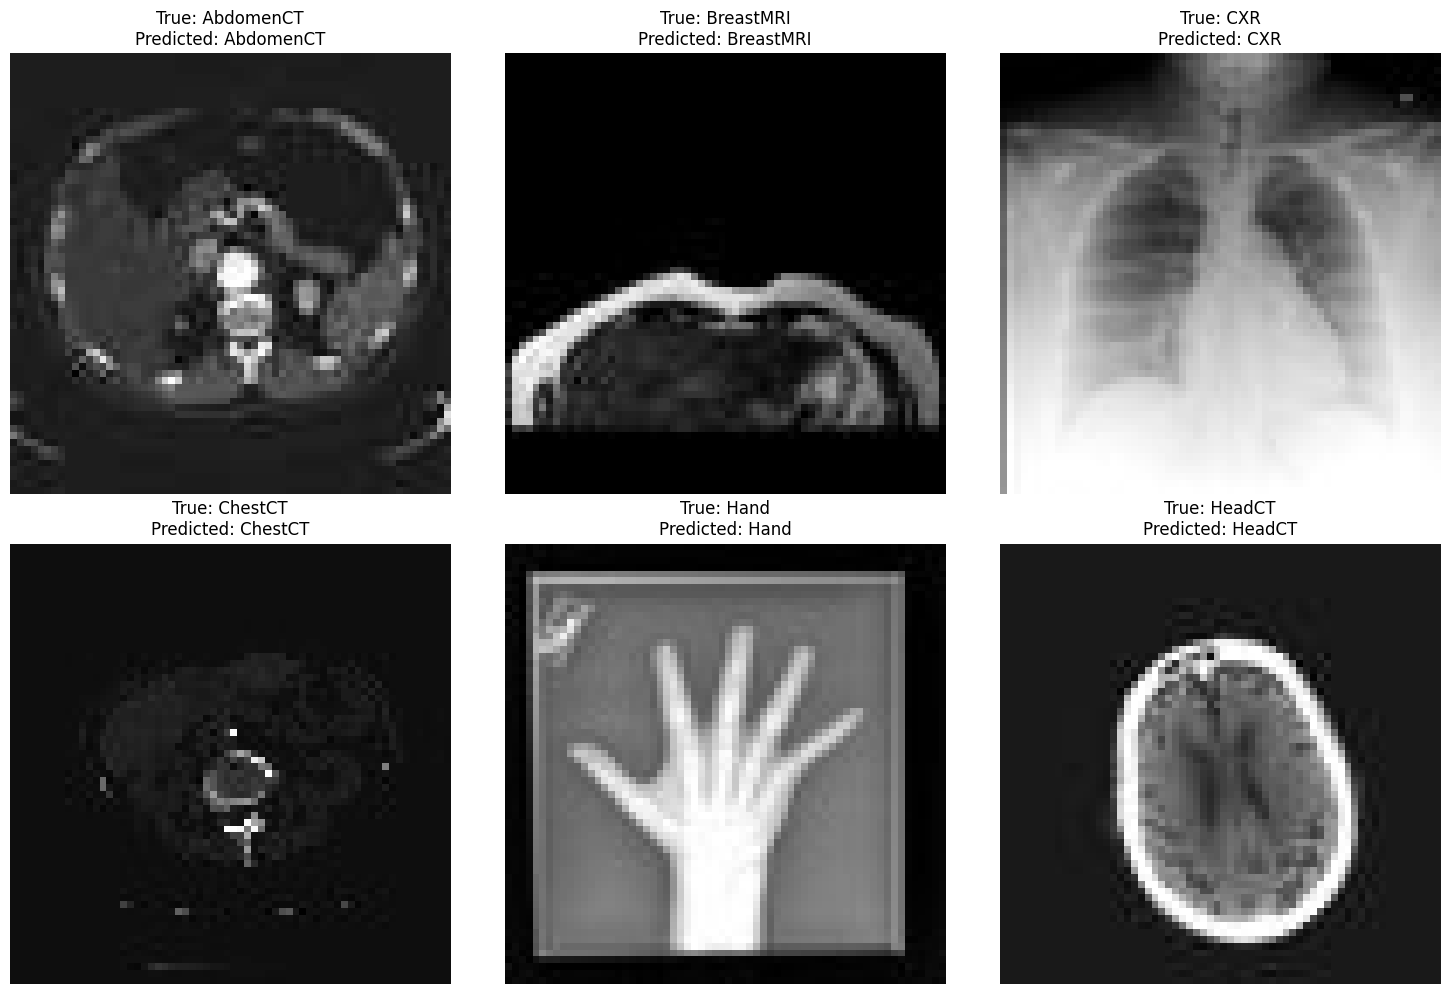

In [130]:
import random
plt.figure(figsize=(7.2, 2.4))
base_dir = val_dir

classes = ["AbdomenCT", "BreastMRI", "CXR","ChestCT",  "Hand", "HeadCT"]

fig, axes = plt.subplots(2 ,3, figsize = (15, 10))

axes = axes.flatten()

for i, cls in enumerate(classes):
    class_dir = f"{base_dir}/{cls}"
    img_name = random.choice(os.listdir(class_dir))
    img_path = f"{class_dir}/{img_name}"

    # Load and preprocess the image
    img = load_img(img_path, target_size=(64, 64), color_mode='grayscale')
    img_array = img_to_array(img)  # Shape: (64, 64, 1)
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 64, 64, 1)
    img_array = img_array / 255.0  # Normalize

    # Get prediction from the model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_label = classes[predicted_class]

    # Plot the image
    axes[i].imshow(img_array.squeeze(), cmap='gray')  # Remove extra dimension for display
    axes[i].set_title(f"True: {cls}\nPredicted: {predicted_label}")
    axes[i].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()  